<a href="https://colab.research.google.com/github/Mosmoove/ML-Calories-Burnt-Prediction/blob/main/ML_Calories_Burnt_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies & Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Collecting Data and Processing Data

In [ ]:
# loading data from a csv file to a pandas DataFrame
calories = pd.read_csv("/calories.csv")

In [ ]:
#printing the first 5 rows of the data
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise_data = pd.read_csv("/exercise.csv")

In [ ]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the Two DataFrames

In [ ]:
calories_dataset = pd.concat([exercise_data, calories['Calories']], axis = 1)
calories_dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
#checking the number of rows and columns
calories_dataset.shape

(15000, 9)

In [ ]:
# getting some info about the dataset
calories_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
#checking for missing values in the dataset
calories_dataset.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


Data Analysis

In [ ]:
#getting some stastical analysis about the data
calories_dataset.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [ ]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

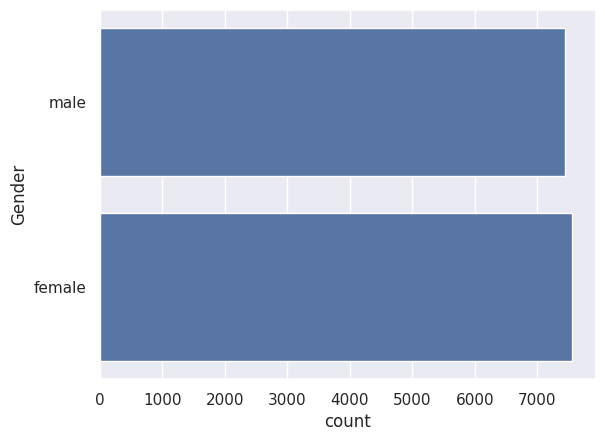

In [ ]:
# plotting the gender column in the distribution plot
sns.countplot(calories_dataset['Gender'], legend=False)

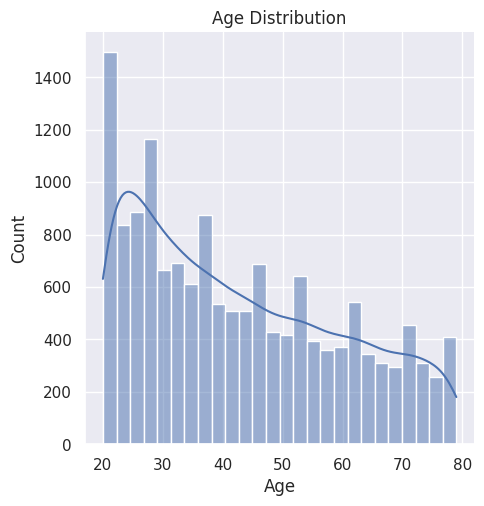

In [ ]:
#finding the distribution of "Age" column
sns.displot(data=calories_dataset["Age"], kde=True)
plt.title("Age Distribution")
plt.show()

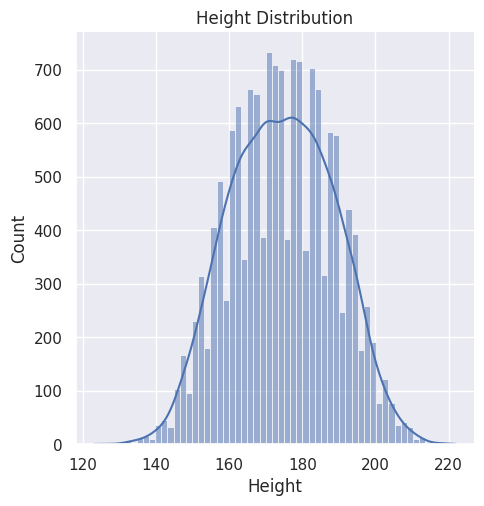

In [ ]:
#finding distribution for the Height column
sns.displot(data=calories_dataset["Height"], kde=True)
plt.title("Height Distribution")
plt.show()

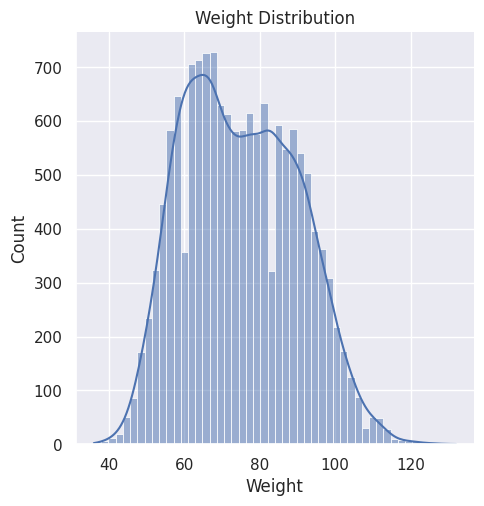

In [ ]:
#find distrubution for Weight column
sns.displot(calories_dataset["Weight"], kde=True)
plt.title("Weight Distribution")
plt.show()

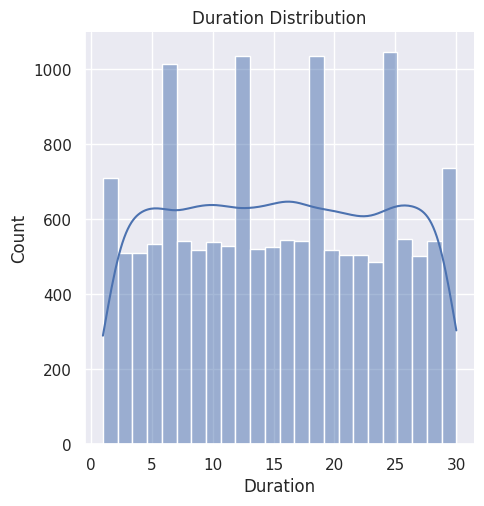

In [ ]:
#find the distribution for "Duration column"
sns.displot(data=calories_dataset["Duration"], kde=True)
plt.title("Duration Distribution")
plt.show()

Find the Correlation in the Dataset
1. Positive Correlation
2. Negative Correlation

Pre-Processing the Gender column to construct heatmap

In [ ]:
calories_dataset['Gender'] = calories_dataset['Gender'].map({'male': 0, 'female': 1})
correlation=calories_dataset.corr()

<Axes: >

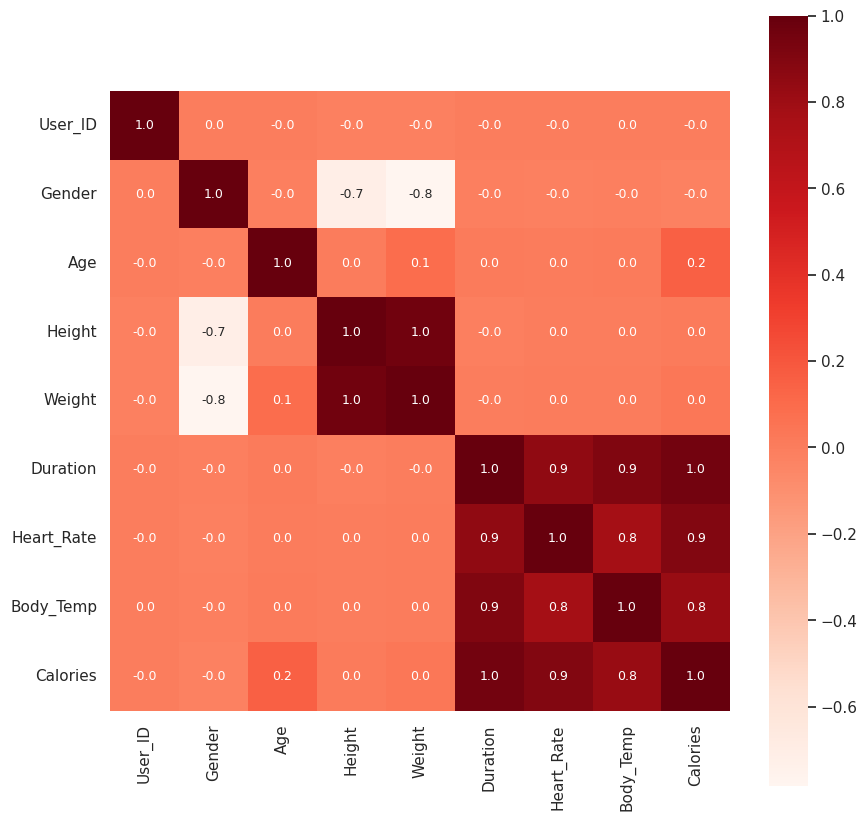

In [ ]:
#constructing a heatmap to understand the correlation between different input features
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':9}, cmap="Reds")

In [ ]:
calories_dataset.replace({'Gender':{'male':0, 'female':1}}, inplace=True)

In [ ]:
calories_dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Separating Features and Target

In [ ]:
x = calories_dataset.drop(columns=['User_ID', "Calories"], axis=1)
y= calories_dataset['Calories']

**Splitting the Data into Training Data and Testing Data**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Training the Model Using XGBRegressor

---



In [ ]:
#loading the model
model = XGBRegressor()

In [ ]:
#training the model with x_train
model.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluating the Model

---

Predicting on Test Data

In [ ]:
test_data_prediction = model.predict(x_test)

In [ ]:
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


Finding the Mean Absolute Error

In [ ]:
mae = metrics.mean_absolute_error(y_test, test_data_prediction)
print("Mean absolute Error: ", mae)

Mean absolute Error:  1.4833678883314132


Calculating the Mean Squared Error (MSE)

In [ ]:
mse = metrics.mean_squared_error(y_test, test_data_prediction)
print("Mean squared error: ", mse)

Mean squared error:  4.710710012461346


Building a Predictive System

In [ ]:
input_data = (1, 125,160.0,59.0,24.0,102.0,40.3)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = model.predict(input_data_reshaped)
print(prediction)
print("The calories burnt:",  round(prediction[0]))


[158.81679]
The calories burnt: 159
